In [2]:
#импорт библиотек
import pandas as pd
import numpy as np
import random

#визуализация
import matplotlib.pyplot as plt
import networkx as nw



Точка: ( 4.894190619842399 ,  1.6378754103427777 )

10 минимальных расстояний от точки: 
[0.07524608437673795, 0.1153170613288758, 0.11629837823451225, 0.1342969241677318, 0.13571217200783206, 0.1474432489169834, 0.17259203599655168, 0.1874897880009947, 0.19343247879343603, 0.20474348404332113]
Кластеры точек, у которых минимальное расстояние до выбранной:  [0, 0, 0, 0, 0, 8, 0, 0, 0, 8] 
Кластер выбранной точки: 0


Точка: ( 4.253094788122263 ,  3.007585654089522 )

10 минимальных расстояний от точки: 
[0.08144703035443669, 0.08721335302416026, 0.12396855174654584, 0.15966036821620594, 0.2218370053928964, 0.25515819779262405, 0.2685274122404442, 0.27535815757790694, 0.44853318751815385, 0.45658348773958807]
Кластеры точек, у которых минимальное расстояние до выбранной:  [8, 0, 0, 0, 8, 8, 0, 0, 9, 8] 
Кластер выбранной точки: 0


Точка: ( 3.1977979486991193 ,  1.3532149890919924 )

10 минимальных расстояний от точки: 
[0.08816668042661961, 0.10492574969311848, 0.1550619719622682, 0.

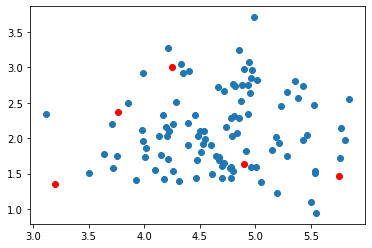

In [12]:
# Train data generator 
def generateData(numberOfClassEl, numberOfClasses): 
    data = [] 
    for classNum in range(numberOfClasses): 
        # Choose random center of 2-dimensional gaussian 
        centerX, centerY = random.random() * 5.0, random.random() * 5.0 
        # Choose numberOfClassEl random nodes with RMS=0.5 
        for rowNum in range(numberOfClassEl): 
            data.append([[random.gauss(centerX, 0.5), random.gauss(centerY, 0.5)], classNum]) 
    return data 

def dist(x1, y1, x2, y2): 
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) 

n = 100
k = np.int(np.sqrt(n)) 
data = [] 
data = generateData(n, k) 
x, y = [], [] 
for i in range(n): 
    x.append(data[i][0][0]) 
    y.append(data[i][0][1]) 
plt.scatter(x, y) 

min_x, max_x = np.min(x), np.max(x) 
min_y, max_y = np.min(y), np.max(y) 

#создадим 5 новых точек
for i in range(5):
    x_new = min_x + np.random.random() * (max_x - min_x) 
    y_new = min_y + np.random.random() * (max_y - min_y) 

    plt.scatter(x_new, y_new, color='r') 

    distance = [] 
    for j in range(n*k):
        distance.append([data[j][1], dist(data[j][0][0], data[j][0][1], x_new, y_new)]) 

    #вычисляем k точек, расстояние которых мин до новой
    points_with_min_distances = []
    clusters = []
    min = 1000
    min_cl = 12
    for j in range(k):
        for i in range(len(distance)):
            if(len(points_with_min_distances) == 0):
                 if(distance[i][1] < min):
                    min = distance[i][1]
                    min_cl = distance[i][0]
            else:
                if((distance[i][1] < min) & (distance[i][1] > points_with_min_distances[j-1])):
                    min = distance[i][1]
                    min_cl = distance[i][0]
        points_with_min_distances.append(min)
        clusters.append(min_cl)
        min = 1000
    print("\n\nТочка: (", x_new,", ", y_new, ")")
    print("\n10 минимальных расстояний от точки: ")
    print(points_with_min_distances)
    
    import numpy as np
    bc = np.bincount(clusters)
    
    print("Кластеры точек, у которых минимальное расстояние до выбранной: ",clusters, "\nКластер выбранной точки:", bc.argmax())

plt.show()